**Data Challenge**

In [ ]:
!pip install -Uqq ipdb

import ipdb # for debugging
from tqdm import tqdm # for debugging apply_progress
import pandas as pd

tqdm.pandas()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00


In [ ]:
# wraps long output text
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
df = pd.read_csv("speakers_and_parties_with_metadata.csv")
df.head(10)

,Speaker,Party,Speech content,Page,Wahlperiode,Sitzung,Drucksache
0,Heiterkeit bei Nikolaus Kramer,AfD,"Echt?! Wo?) Mit Händen zu greifen ist, es gibt...",5,8,81,NaN
1,Birgit Hesse,SPD,"Meine sehr geehrten Damen und Herren, ich bitt...",5,8,81,NaN
2,Julian Barlen,SPD,He!) Im Mai gratuliere ich recht herzlich nach...,6,8,81,8/3798
3,Julian Barlen,SPD,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,7,8,81,NaN
4,Jan-Phillip Tadsen,AfD,"Kampagne, Herr Barlen! Sie hören nicht auf! Au...",8,8,81,NaN
5,Thomas de Jesus Fernandes,AfD,Verstehen können wir den auch nicht!) Ich erin...,9,8,81,NaN
6,Birgit Hesse,SPD,"Einen Moment bitte, Herr Fraktionsvorsitzender...",9,8,81,NaN
7,Thomas de Jesus Fernandes,AfD,"Nach der Rede, das ist eine Verhöhnung!) meine...",10,8,81,NaN
8,Nikolaus Kramer,AfD,Da brauchen Sie sich doch nicht zu entschuldig...,11,8,81,NaN
9,Birgit Hesse,SPD,"Vielen Dank, Herr Fraktionsvorsitzender! Bevor...",11,8,81,NaN


In [ ]:
def get_parties(df):
  parties=[]
  for party in df['Party']:
      if party not in parties:
          parties.append(party)
  return parties

def get_sessions(df):
  sessions = []
  for session in df['Sitzung']:
      if session not in sessions:
          sessions.append(session)
  return sessions

def check_result(sessions, new_df):
  for session in sessions:
    count=0
    for data in new_df.iterrows():
        if data[1]['session'] == session:
            count+=1
    print(f"session {session} has count {count}")

def get_summary_per_sessions(party, session, df):
    speech_content = []
    participant_list = []

    for data in df.iterrows():

        if data[1]['Sitzung'] == session:
            if data[1]['Party'] == party:

                if data[1]['Speaker'] not in participant_list:
                    participant_list.append(data[1]['Speaker'])

                if data[1]['Speech content'] not in speech_content:
                    speech_content.append(data[1]['Speech content'])

    return {
        "session": session,
        "content": speech_content,
        "participant_list": participant_list,
        "party": party,
    }


def create_new_dataframe(parties, sessions):
  summaries = []
  for party in parties:
    for session in sessions:
        summaries.append(get_summary_per_sessions(party, session, df))

  new_df = pd.DataFrame((summary) for summary in summaries)
  new_df.columns=['session','content','participant_list', 'party']

  return new_df


In [ ]:
parties=get_parties(df)
sessions=get_sessions(df)

new_df = create_new_dataframe(parties, sessions)

new_df.head(3)

,session,content,participant_list,party
0,81,"[Echt?! Wo?) Mit Händen zu greifen ist, es gib...","[Heiterkeit bei Nikolaus Kramer, Jan-Phillip T...",AfD
1,80,[Sehr geehrte Frau Präsidentin! Meine Damen un...,"[Jens-Holger Schneider, Thomas de Jesus Fernan...",AfD
2,79,"[Einen wunderschönen guten Morgen, Frau Landta...","[Martin Schmidt, Thomas de Jesus Fernandes, Ho...",AfD


In [ ]:
example = new_df.iloc[0]

print("party: ", example.party)
print("session: ", example.session)

print("participant_list: ")
for participant in example.participant_list:
  print(participant)
  print('---')

print("content: ")
for content in example.content:
  print(content)
  print('---')

party:  AfD
session:  81
participant_list: 
Heiterkeit bei Nikolaus Kramer
---
Jan-Phillip Tadsen
---
Thomas de Jesus Fernandes
---
Nikolaus Kramer
---
Stephan J. Reuken
---
Thore Stein
---
Martin Schmidt
---
Petra Federau
---
Horst Förster
---
Enrico Schult
---
Jens-Holger Schneider
---
Heiterkeit bei Thomas de Jesus Fernandes
---
Michael Meister
---
content: 
Echt?! Wo?) Mit Händen zu greifen ist, es gibt sehr viele Menschen in unserem Bundesland, in Deutschland und auch anderen Staaten der Europäischen Union, die offensichtlich unzufrieden sind. Dies mit seinem Stimmverhalten zum Ausdruck zu bringen, ist weder falsch noch verwerflich andersherum wird ein Schuh daraus, die Menschen dürfen genau das. Wird Unzufriedenheit auf diese Weise artikuliert, dann sind wir alle gut beraten, dies zur Kenntnis zu nehmen. Von erhobenen Zeigefingern in Richtung der Wählerinnen und Wähler ist abzusehen. An den zitierten Artikel 3 der Landesverfassung und den darin beschriebenen Souverän sei hier eri

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

summarize_model_name = "deutsche-telekom/mt5-small-sum-de-mit-v1"
summarize_tokenizer = AutoTokenizer.from_pretrained(summarize_model_name)
summarize_model = AutoModelForSeq2SeqLM.from_pretrained(summarize_model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

In [ ]:
text_example = """
Falsch!) in dem Integrationspolitik eine Daueraufgabe ist. Migration ist nicht verzichtbar.
Die Zuwanderung in den letzten Jahren hat unter anderem auch dazu geführt,  dass verstärkt
Ärzte in unseren Krankenhäusern arbeiten,  dass in vielen Bereichen der Pflege ausländische
Fachkräfte die wichtigen Arbeiten absichern, die Tourismusbranche und die Gastronomie ohne
zugewanderte Arbeitskräfte nicht mehr auskommt  und Handwerksbetriebe immer öfter junge
Menschen mit Zuwanderungsgeschichte für eine Ausbildung begeistern können.
(Der Abgeordnete Horst Förster bittet um das Wort für eine Anfrage.)
Präsidentin Birgit Hesse: Frau Abgeordnete, gestatten Sie eine Zwischenfrage?
Dagmar Kaselitz, SPD: Nein. (Stephan J. Reuken, AfD: Natürlich nicht!)
Wenn sich dann nach Wahlergebnissen wie vom Wochenende Menschen nicht mehr sicher fühlen,
dann liegt es an uns, gemeinsam ein Umfeld zu schaffen, das dieses Sicherheitsgefühl wieder
zurückbringt.  Es liegt an uns, mehr Integration zu wagen. Immer werden wir veränderten
Bedingungen mit notwendigen gesetzlichen Regelungen, die unseren Anspruch an eine offene
Gesellschaft widerspiegeln, begegnen. (JensHolger Schneider, AfD: Das ist Amtsanmaßung.)
Immer wieder geht es darum, Menschen zu unterstützen und die Ursachen für ihre Migration
oder Flucht zu begreifen. Dabei werden wir der AfD nicht die Deutungshoheit für einige
unbestimmte Rechtsbegriffe in ihrem Gesetzentwurf überlassen, nicht bei „deutscher Kultur
und Identität“, nicht bei „sozialadäquatem Verhalten“ oder „deutschen Lebensverhältnissen“.
Diesen Gesetzentwurf und den vorliegenden Änderungsantrag lehnen wir als Koalition ab.
Ich danke für Ihre Aufmerksamkeit! (Beifall vonseiten der Fraktionen der SPD und DIE LINKE)
Präsidentin Birgit Hesse: Vielen Dank, Frau Abgeordnete! Zu Ihrem Redebeitrag liegt mir
noch eine Kurzintervention durch Herrn Förster vor.
Sitzung am 12. Juni 2024 77 Horst Förster, AfD: Vielen Dank, Frau Kaselitz!
Drei Punkte: „Einwanderungsland“ immer wieder dieser falsche Begriff! Hier kommen zwar viele
Menschen zu uns, wenn wir ein Einwanderungsland wären, würden wir die klassischen Regeln eines
Einwanderungslandes beachten.  Dann würden wir bestimmen, wer zu uns kommt, und würden nicht
einfach jeden reinlassen.  Das ist also eine Begriffsverwirrung.
Dann sprechen Sie in dem Zusammenhang von den Ärzten, da war kürzlich ein entsprechender Artikel
im „Nordkurier“. Natürlich wissen wir alle, dass wir viele, auch gerade im ärztlichen
Versorgungsbereich bei den Krankenhäusern, Ärzte haben, die kommen, sie entstammen aber
nicht dem klassischen kritischen Potenzial von Migranten, die hier in der Thematik
angesprochen werden. Und Sie vergessen dabei auch eins, das immer zu kurz kommt, teilweise
kommen diese Menschen aus armen Ländern, wo sie ausgebildet worden sind für viel Geld,
und wir beschäftigen sie hier.  Das ist im Grunde aus der Sicht einiger eine Art Neokolonialismus.
Jedenfalls muss man das nicht als große Errungenschaft hier anbringen.  Dann sprechen Sie die
Sicherheit an und gerade angesichts des gerade erlebten Ereignisses von Mannheim diese Perversion,
dass Sie sagen, wenn hier irgendwas passiert, dann müssen wir fragen, ob wir versagt haben,
kultursensibel nicht diese brutalen islamistischen Gewalttäter hier zu integrieren.
Schämen Sie sich! (Beifall vonseiten der Fraktion der AfD und Dr. Eva Maria SchneiderGärtner,
fraktionslos) Präsidentin Birgit Hesse: Einen Moment bitte, Frau Kaselitz! Herr Förster, ich würde
Sie bitten, das Letzte zurückzunehmen beziehungsweise bei Ihrer Wortwahl etwas mehr darauf zu achten,
wir sind hier in einem Plenum, im Parlament. Und ich glaube, das ist nicht ganz so angemessen, die
letzte Aussage. Horst Förster, AfD: Dann nehme ich das hiermit zurück und sage, dass Sie in diesem
Augenblick mal an die Opfer denken sollten, wie die Ihre Aussagen hier werten würden. Präsidentin
Birgit Hesse: Okay, vielen Dank! Frau Kaselitz, möchten Sie erwidern?
"""

def sumarize_german_text(text, max_input_length=None):
  inputs = ["summarize: " + text]

  max_input_length_to_use = 512 if max_input_length else len(text)

  inputs = summarize_tokenizer(inputs, max_length=max_input_length_to_use, truncation=True, return_tensors="pt").to('cuda')
  output = summarize_model.to('cuda').generate(**inputs, num_beams=8, do_sample=True, min_length=10, max_length=64)
  decoded_output = summarize_tokenizer.batch_decode(output, skip_special_tokens=True)[0]

  return decoded_output.strip()


sumarize_german_text(text_example)

'Einwanderungsland ist eine Begriffsverwirrung, die in der Integrationspolitik stattfindet. Sie wurde am 12. Juni 2024 von Präsidentin Birgit Hesse eröffnet.'

In [ ]:
def summarized_content_per_party_and_session(new_df, party, session):
  filtered_df = new_df[(new_df['party'] == party) & (new_df['session'] == session)]

  filtered_df['summary'] = filtered_df['content'].progress_apply(
    lambda x: [sumarize_german_text(text) for text in x]
  )

  return filtered_df


afd_session_81 = summarized_content_per_party_and_session(new_df, 'AfD', 81)

100%|██████████| 1/1 [01:30<00:00, 90.93s/it]
<ipython-input-9-e91a00f59ed3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['summary'] = filtered_df['content'].progress_apply(


In [ ]:
print('AfD, session 81')
print('---')
print('Summary of first speech:')
print(afd_session_81.summary.iloc[0][0])
print('---')
print('First speech:')
print(afd_session_81.content.iloc[0][0])

AfD, session 81
---
Summary of first speech:
Der Begriff "respektvoll" ist eine deutsche Streitkultur, die in den Bereichen der politischen Streitkultur bezeichnet wird. Der Begriff "respektvoll" gilt als einer der bedeutendsten politischen Streitkultur in Deutschland.
---
First speech:
Echt?! Wo?) Mit Händen zu greifen ist, es gibt sehr viele Menschen in unserem Bundesland, in Deutschland und auch anderen Staaten der Europäischen Union, die offensichtlich unzufrieden sind. Dies mit seinem Stimmverhalten zum Ausdruck zu bringen, ist weder falsch noch verwerflich andersherum wird ein Schuh daraus, die Menschen dürfen genau das. Wird Unzufriedenheit auf diese Weise artikuliert, dann sind wir alle gut beraten, dies zur Kenntnis zu nehmen. Von erhobenen Zeigefingern in Richtung der Wählerinnen und Wähler ist abzusehen. An den zitierten Artikel 3 der Landesverfassung und den darin beschriebenen Souverän sei hier erinnert. Wenden möchte ich mich deshalb von dieser Stelle aus an die Bürgerinn

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

sentiment_model_name = "oliverguhr/german-sentiment-bert"
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name)
sentiment_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)
sentiment_classifier = pipeline("text-classification", model=sentiment_model, tokenizer=sentiment_tokenizer, truncation=True, device=0)

In [ ]:
sentiment_example_1 = sentiment_classifier(afd_session_81.summary.iloc[0][0])

print(sentiment_example_1)

[{'label': 'neutral', 'score': 0.9999902248382568}]


In [ ]:
def label_per_sentence(x):
  result = []
  for y in x:
    classifier_result = sentiment_classifier(y)
    label = classifier_result[0]['label']
    result.append(label)

  return result

def score_per_sentence(x):
  result = []
  for y in x:
    classifier_result = sentiment_classifier(y)
    score = classifier_result[0]['score']
    result.append(score)

  return result

afd_session_81['sentiment_label'] = afd_session_81['summary'].progress_apply(label_per_sentence)
afd_session_81['sentiment_score'] = afd_session_81['summary'].progress_apply(score_per_sentence)

print("sentiment label:")
print(afd_session_81.sentiment_label.iloc[0][0])
print("sentiment score:")
print(afd_session_81.sentiment_score.iloc[0][0])
print("number of speeches:")
print(len(afd_session_81.sentiment_label.iloc[0]))

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]
<ipython-input-17-bcb25dc0983d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afd_session_81['sentiment_label'] = afd_session_81['summary'].progress_apply(label_per_sentence)
100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

sentiment label:
neutral
sentiment score:
0.9999902248382568
number of speeches:
60



<ipython-input-17-bcb25dc0983d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afd_session_81['sentiment_score'] = afd_session_81['summary'].progress_apply(score_per_sentence)


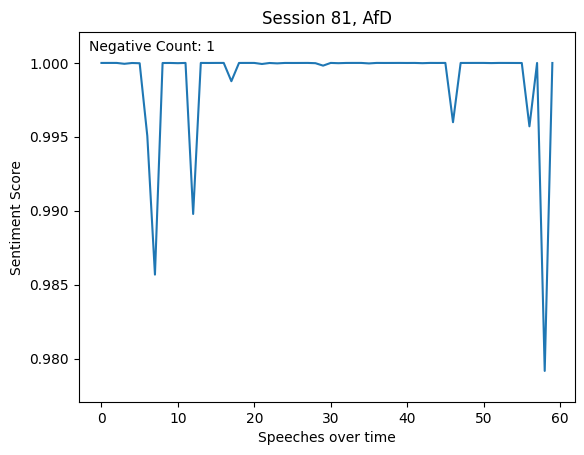

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pos = np.arange(len(afd_session_81.sentiment_score.iloc[0]))
plt.plot(y_pos, afd_session_81.sentiment_score.iloc[0])


min_value = min(afd_session_81.sentiment_score.iloc[0])
max_value = max(afd_session_81.sentiment_score.iloc[0])

padding = (max_value - min_value) * 0.1  # 10% padding

plt.ylim(min_value - padding, max_value + padding)

plt.ylabel("Sentiment Score")
plt.xlabel("Speeches over time")
plt.title("Session 81, AfD")


negative_count = afd_session_81.sentiment_label.iloc[0].count('negative')

plt.text(0.02, 0.95, f"Negative Count: {negative_count}", transform=plt.gca().transAxes)

plt.show()